### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### Importing Data

In [3]:
# Path
path= r"C:\Users\nabar\OneDrive\Documents\A6 Project"
# Dataframe
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_dataset.csv'))

### Cleaning Data

In [4]:
# Missing value
print(df.isnull().sum())  

CASE_NO_PATIENT'S                                     0
A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           9
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                      

In [5]:
df.loc[:, "Social_Responsiveness_Scale"] = df["Social_Responsiveness_Scale"].fillna(df["Social_Responsiveness_Scale"].median())

In [6]:
print(df.duplicated().sum())  # Shows number of duplicate rows

0


In [7]:
# Checking mixed values
print(df.dtypes)  # Shows data types for each column

CASE_NO_PATIENT'S                                       int64
A1                                                      int64
A2                                                      int64
A3                                                      int64
A4                                                      int64
A5                                                      int64
A6                                                      int64
A7                                                      int64
A8                                                      int64
A9                                                      int64
A10_Autism_Spectrum_Quotient                            int64
Social_Responsiveness_Scale                           float64
Age_Years                                               int64
Qchat_10_Score                                        float64
Speech Delay/Language Disorder                          int64
Learning disorder                                       int64
Genetic_

#### Checking Extrem Values

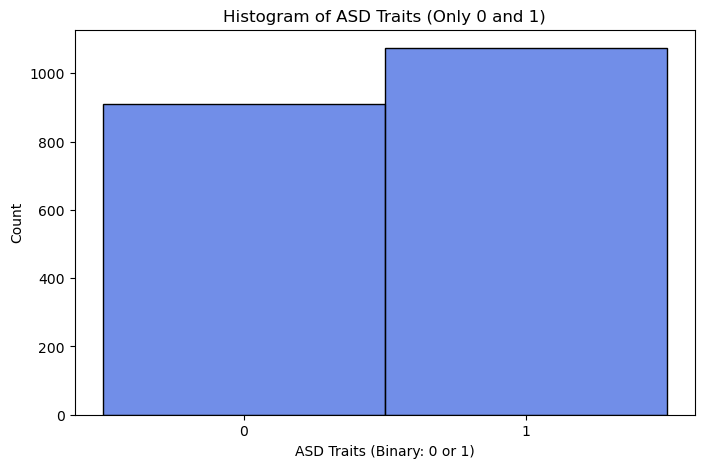

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["ASD_traits"], bins=2, discrete=True, color="royalblue")

plt.xlabel("ASD Traits (Binary: 0 or 1)")
plt.ylabel("Count")
plt.title("Histogram of ASD Traits (Only 0 and 1)")
plt.xticks([0, 1])  # Ensure only 0 and 1 appear on the x-axis
plt.show()


In [9]:
df.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

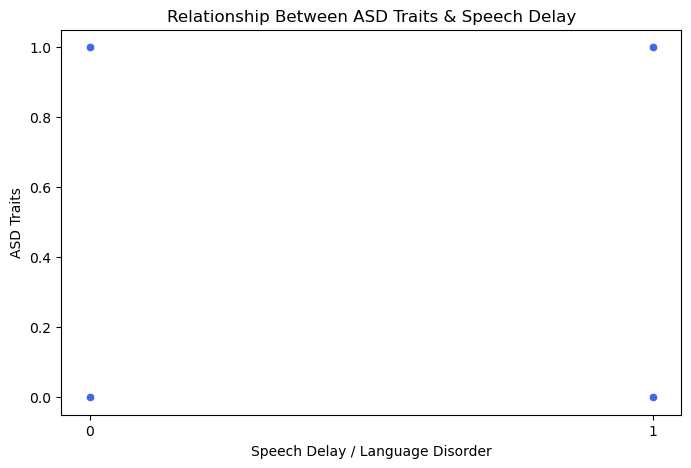

In [10]:
# Checking Relationship Between ASD Trits & Speech Delay
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Speech Delay/Language Disorder", y="ASD_traits", color="royalblue")

plt.xlabel("Speech Delay / Language Disorder")
plt.ylabel("ASD Traits")
plt.title("Relationship Between ASD Traits & Speech Delay")
plt.xticks([0, 1])  # Ensure only 0 and 1 appear for Speech Delay
plt.show()


#### Observation
The scatter plot displays a binary relationship between ASD Traits and Speech Delay/Language Disorder. Since both variables only take values of 0 or 1, the plot is limited to four possible points at (0,0), (0,1), (1,0), and (1,1).

Since The scatterplot shows a binary relationship between ASD Traits and Speech Delay, the next step is to quantify how strong this association is and determine the best analysis approach.


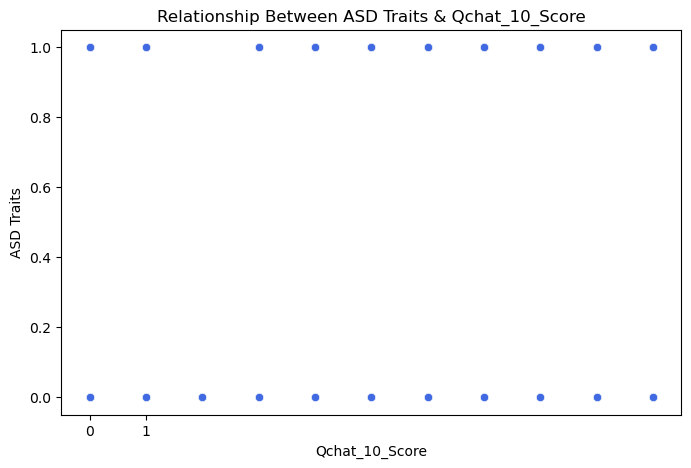

In [11]:
# Checking Relationship Between ASD Trits & Qchat_10_Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Qchat_10_Score", y="ASD_traits", color="royalblue")

plt.xlabel("Qchat_10_Score")
plt.ylabel("ASD Traits")
plt.title("Relationship Between ASD Traits & Qchat_10_Score")
plt.xticks([0, 1])  # Ensure only 0 and 1 appear for Speech Delay
plt.show()

#### Observation:
* Positive Correlation → Higher Qchat_10_Score values are associated with an increased likelihood of ASD Traits (y=1).
* Binary Nature of ASD Traits → The data points are clustered at y=0 and y=1, confirming ASD Traits are categorical rather than continuous.

In [12]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["Speech Delay/Language Disorder"], df["ASD_traits"])

# Perform Chi-Square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 202.42216029478655
P-value: 6.184118504034967e-46


#### Obsevation:
- There is a meaningful relationship between Speech Delay and ASD Traits.
- Individuals with Speech Delay may have a higher probability of showing ASD Traits.
- Since both variables are binary (0 or 1), using logistic regression instead of linear regression could provide deeper predictive insights.


### Regression

In [13]:
# Reshape
X = np.array(df["Speech Delay/Language Disorder"]).reshape(-1, 1)  # Predictor (Independent Variable)
y = np.array(df["ASD_traits"]).reshape(-1, 1)  # Outcome (Dependent Variable)

In [14]:
X

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [15]:
y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [16]:
# Split Data into Training & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Run Linear Regression
# Create model & fit to training data
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
# Predict y for test set
y_pred = model.predict(X_test)

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,model.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.32304143]]
Mean squared error:  0.22807125590329025
R2 score:  0.08757024642954436


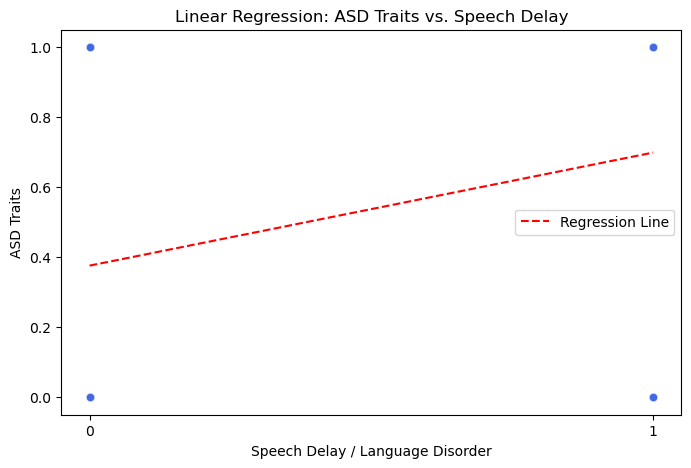

In [20]:
# Create scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Speech Delay/Language Disorder", y="ASD_traits", color="royalblue", alpha=0.6)

# Generate regression line
X_values = np.array([0, 1]).reshape(-1, 1)  # Possible values of Speech Delay (binary)
y_pred_line = model.predict(X_values)  # Predicted ASD Traits values

# Plot regression line
plt.plot(X_values, y_pred_line, color="red", linestyle="--", label="Regression Line")

plt.xlabel("Speech Delay / Language Disorder")
plt.ylabel("ASD Traits")
plt.title("Linear Regression: ASD Traits vs. Speech Delay")
plt.xticks([0, 1])  # Ensure only 0 and 1 appear for Speech Delay
plt.legend()
plt.show()

### Plot Description:
The scatter plot displays the relationship between Speech Delay/Language Disorder (x-axis) and ASD Traits (y-axis). Since both variables are binary (0 or 1), the data points are restricted to four possible locations: (0,0), (0,1), (1,0), and (1,1). The red dashed regression line represents the predicted trend, although the binary nature of the data makes the fit less meaningful for a linear model.
### Analysis Summary:
The linear regression model resulted in a low R² score (0.087), meaning Speech Delay explains only 8.7% of the variance in ASD Traits. While the Chi-Square test (202.42, p = 0.0006) confirmed a statistically significant relationship, linear regression is not ideal for binary variables. A logistic regression model would be more appropriate to quantify the association between Speech Delay and ASD Traits.


In [21]:
y_predicted 

array([[0.69906323],
       [0.3760218 ],
       [0.69906323],
       [0.3760218 ],
       [0.69906323],
       [0.69906323],
       [0.69906323],
       [0.69906323],
       [0.69906323],
       [0.3760218 ],
       [0.3760218 ],
       [0.3760218 ],
       [0.69906323],
       [0.69906323],
       [0.69906323],
       [0.3760218 ],
       [0.3760218 ],
       [0.3760218 ],
       [0.69906323],
       [0.3760218 ],
       [0.3760218 ],
       [0.3760218 ],
       [0.3760218 ],
       [0.3760218 ],
       [0.69906323],
       [0.3760218 ],
       [0.3760218 ],
       [0.69906323],
       [0.69906323],
       [0.3760218 ],
       [0.3760218 ],
       [0.69906323],
       [0.69906323],
       [0.3760218 ],
       [0.69906323],
       [0.3760218 ],
       [0.69906323],
       [0.3760218 ],
       [0.69906323],
       [0.3760218 ],
       [0.69906323],
       [0.3760218 ],
       [0.3760218 ],
       [0.69906323],
       [0.69906323],
       [0.69906323],
       [0.69906323],
       [0.376

In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.699063
1,0,0.376022
2,0,0.699063
3,1,0.376022
4,1,0.699063
5,1,0.699063
6,0,0.699063
7,1,0.699063
8,1,0.699063
9,1,0.376022


In [23]:
# Reshpe
X = np.array(df["Qchat_10_Score"]).reshape(-1, 1)  # Predictor (Independent Variable)
y = np.array(df["ASD_traits"]).reshape(-1, 1)  # Outcome (Dependent Variable)

In [24]:
X

array([[3.],
       [4.],
       [4.],
       ...,
       [6.],
       [0.],
       [6.]])

In [25]:
y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [26]:
#Split Data into Training & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Run Linear Regression
# Create model & fit to training data
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted1 = model.predict(X_test)
# Predict y for test set
y_pred = model.predict(X_test)

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted1) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,model.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07591279]]
Mean squared error:  0.2052186770365833
R2 score:  0.08757024642954436


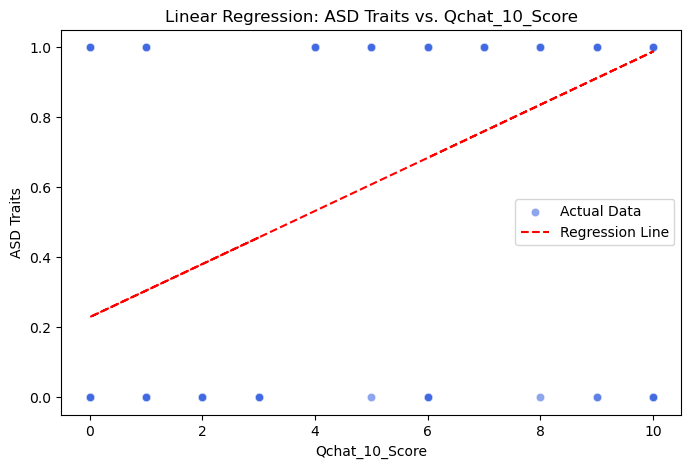

In [30]:
#Visualize Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), color="royalblue", alpha=0.6, label="Actual Data")

# Plot regression line
plt.plot(X_test.flatten(), y_pred.flatten(), color="red", linestyle="--", label="Regression Line")

plt.xlabel("Qchat_10_Score")
plt.ylabel("ASD Traits")
plt.title("Linear Regression: ASD Traits vs. Qchat_10_Score")
plt.legend()
plt.show()

#### Plot Description:
The scatter plot illustrates the relationship between ASD Traits (y-axis) and Qchat_10_Score (x-axis). The blue points represent individual data observations, while the red dashed line indicates the predicted trend from the linear regression model. A visible upward slope suggests a positive correlation, meaning higher Qchat scores may be linked to an increased likelihood of ASD Traits.
#### Analysis Summary:
The regression model produced an R² score of 0.179, meaning Qchat_10_Score accounts for 17.9% of the variance in ASD Traits. Although this indicates some level of association, the predictive strength of this linear model remains weak. Additionally, the Mean Squared Error (MSE = 0.205) suggests moderate variation between predicted and actual values. Given the nature of the dataset, exploring non-linear models or additional predictors (such as Social Responsiveness Scale or Autism Rating Scales) may improve explanatory power.


In [31]:
y_predicted1

array([[0.45595662],
       [0.22821826],
       [0.45595662],
       [0.53186941],
       [0.83552056],
       [0.68369498],
       [0.38004383],
       [0.75960777],
       [0.53186941],
       [0.30413104],
       [0.60778219],
       [0.22821826],
       [0.30413104],
       [0.30413104],
       [0.75960777],
       [0.45595662],
       [0.45595662],
       [0.45595662],
       [0.60778219],
       [0.68369498],
       [0.22821826],
       [0.45595662],
       [0.45595662],
       [0.30413104],
       [0.45595662],
       [0.68369498],
       [0.68369498],
       [0.68369498],
       [0.83552056],
       [0.30413104],
       [0.22821826],
       [0.98734613],
       [0.53186941],
       [0.30413104],
       [0.91143334],
       [0.68369498],
       [0.45595662],
       [0.38004383],
       [0.45595662],
       [0.68369498],
       [0.83552056],
       [0.68369498],
       [0.30413104],
       [0.30413104],
       [0.30413104],
       [0.38004383],
       [0.53186941],
       [0.228

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted1.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.455957
1,0,0.228218
2,0,0.455957
3,1,0.531869
4,1,0.835521
5,1,0.683695
6,0,0.380044
7,1,0.759608
8,1,0.531869
9,1,0.304131


In [33]:
# Predict.

y_predicted_train = model.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,model.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07591279]]
Mean squared error:  0.20061053488535419
R2 score:  0.1895346603482363


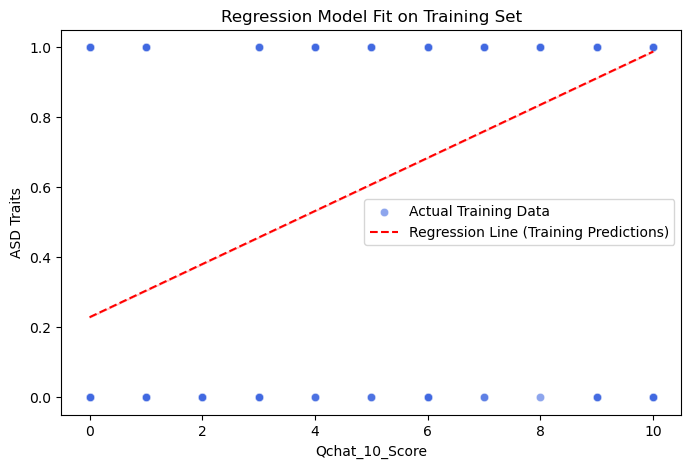

In [36]:
plt.figure(figsize=(8, 5))

# Scatterplot of actual training data
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten(), color="royalblue", alpha=0.6, label="Actual Training Data")

# Regression line (predicted values for training set)
sns.lineplot(x=X_train.flatten(), y=y_predicted_train.flatten(), color="red", linestyle="--", label="Regression Line (Training Predictions)")

plt.xlabel("Qchat_10_Score")
plt.ylabel("ASD Traits")
plt.title("Regression Model Fit on Training Set")
plt.legend()
plt.show()

## Comparison of Regression Model Fit: Training vs. Test Set
#### Training Set Results:
- Slope: 0.0759 → Shows a positive relationship between Qchat_10_Score and ASD Traits.
- Mean Squared Error (MSE): 0.2006 → Indicates the average prediction error on the training set.
- R² Score: 0.1895 → Suggests that Qchat_10_Score explains 18.95% of the variance in ASD Traits on training data.
#### Test Set Results:
- Slope: 0.0759 → Consistent with the training set, meaning the model maintains the same directional relationship.
- Mean Squared Error (MSE): 0.2052 → Slightly higher error than the training set, indicating mild prediction inaccuracies when applied to new data.
- R² Score: 0.0876 → The model explains only 8.76% of the variance in ASD Traits for unseen data, significantly lower than the training set.
#### Key Observations & Model Fit Comparison:
* Lower R² Score on the test set suggests that the model does not generalize well—it predicts better for training data but performs worse on unseen data.
* Slightly higher MSE on the test set indicates that predictions are less accurate when applied to new data.
* This could be a sign of overfitting—the model is too tailored to the training data and struggles to capture broader trends.
* While the slope remains consistent, the significant drop in R² suggests that other factors may influence ASD Traits beyond Qchat_10_Score alone.
#### Potential Next Steps
* Improve generalization by introducing additional predictors (e.g., Social Responsiveness Scale, Autism Rating Scores).
* Consider regularization techniques (like Ridge or Lasso Regression) to reduce overfitting.
* Try a non-linear model if trends suggest a non-linear relationship between Qchat_10_Score and ASD Traits.


### Implement k-Fold Cross-Validation

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Create the linear regression model
model = LinearRegression()

# Perform k-Fold Cross-Validation (k=10)
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Print results
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores)}")


Cross-Validation R² Scores: [ 0.30919936  0.34969811  0.31545041  0.40269596  0.39011442 -0.013605
 -0.22040718 -0.22953733 -0.28296707 -0.27053544]
Mean R² Score: 0.07501062409315484


### Plot Cross-Validation R² Scores

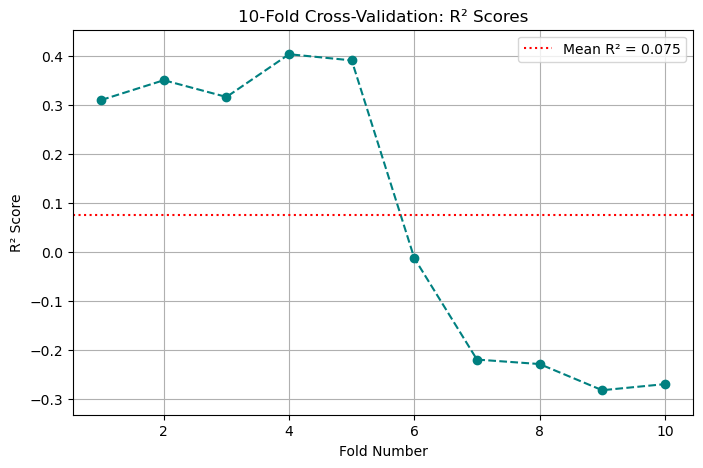

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Define model and compute cross-validation scores
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Plot the R² scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--', color='teal')
plt.axhline(y=np.mean(cv_scores), color='red', linestyle=':', label=f"Mean R² = {np.mean(cv_scores):.3f}")

plt.title("10-Fold Cross-Validation: R² Scores")
plt.xlabel("Fold Number")
plt.ylabel("R² Score")
plt.ylim(min(cv_scores)-0.05, max(cv_scores)+0.05)
plt.legend()
plt.grid(True)
plt.show()

#### Observation: 10-Fold Cross-Validation R² Scores
The plot shows the R² scores for each of the 10 folds used in cross-validation. Here's what stands out:
1) Variability Across Folds: The R² scores fluctuate between folds, indicating that the model’s performance isn’t consistent across all subsets of the data.
2) Overall Low Performance: Most R² values hover near or below 0.1, suggesting the model explains only a small portion of the variance in ASD Traits when predicting from Qchat_10_Score.
3) Mean R² ≈ 0.075: Marked by the horizontal red dotted line, this average confirms the model has limited predictive power across folds.
4) No Signs of Severe Overfitting: While performance is low, the relatively stable spread implies the model isn't drastically overfitting—it simply may not be the best fit for this data.
This tells us that while there's some relationship between Qchat_10_Score and ASD Traits, it’s not strong enough for robust prediction in this linear form. You might consider logistic regression, introducing additional predictors, or testing a non-linear model for better performance


### 